In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
housingDf = pd.read_csv("Housing.csv")

In [3]:
housingDf.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
housingDf.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

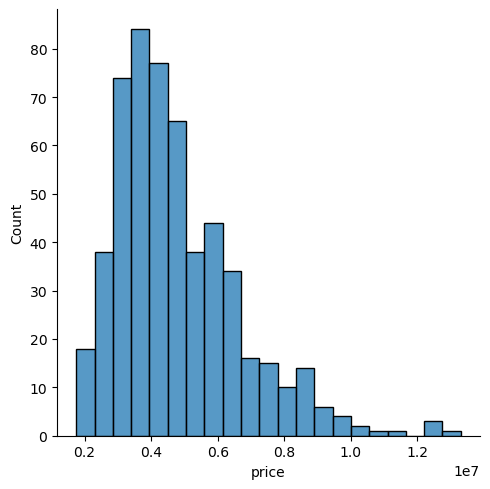

In [9]:
sbn.displot(housingDf["price"])

<Axes: xlabel='area', ylabel='price'>

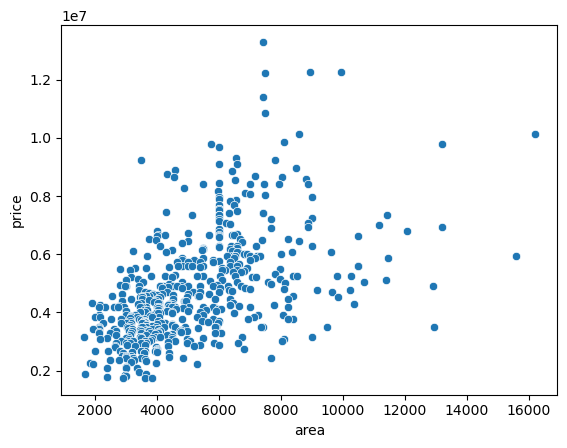

In [10]:
sbn.scatterplot(x="area" ,y="price",data=housingDf)

In [13]:
housingDf1 = housingDf.sort_values("price",ascending = False).iloc[5:]

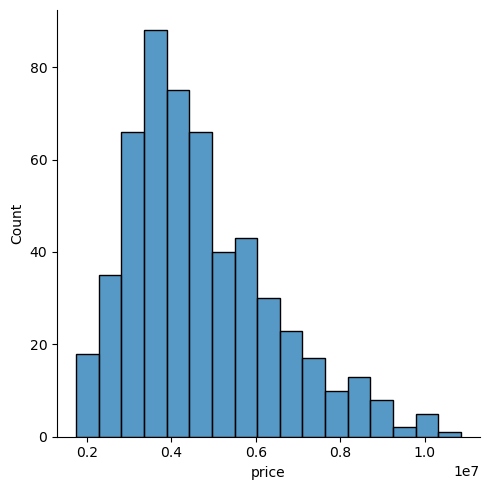

In [15]:
sbn.displot(housingDf1["price"])

In [17]:
housingDf=housingDf1

In [19]:
#sbn.counplot(x="maindrop",data=housingDf)

In [21]:
housingDf = housingDf.drop("mainroad",axis=1)

In [23]:
from sklearn import preprocessing

In [25]:
labelEncoder= preprocessing.LabelEncoder()

In [27]:
housingDf["guestroom"]= labelEncoder.fit_transform(housingDf["guestroom"])

In [29]:
housingDf["basement"]= labelEncoder.fit_transform(housingDf["basement"])

In [31]:
housingDf["hotwaterheating"]= labelEncoder.fit_transform(housingDf["hotwaterheating"])

In [33]:
housingDf["airconditioning"]= labelEncoder.fit_transform(housingDf["airconditioning"])

In [35]:
housingDf["prefarea"]= labelEncoder.fit_transform(housingDf["prefarea"])

In [37]:
onehotencoder = preprocessing.OneHotEncoder()

In [39]:
housingDf=pd.concat([housingDf,pd.get_dummies(housingDf["furnishingstatus"],prefix="furnishingstatus")],axis=1)

In [41]:
housingDf = housingDf.drop("furnishingstatus",axis=1)

In [43]:
housingDf

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
5,10850000,7500,3,3,1,0,1,0,1,2,1,False,True,False
6,10150000,8580,4,3,4,0,0,0,1,2,1,False,True,False
7,10150000,16200,5,3,2,0,0,0,0,0,0,False,False,True
8,9870000,8100,4,1,2,1,1,0,1,2,1,True,False,False
9,9800000,5750,3,2,4,1,0,0,1,1,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,0,2,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,0,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,True,False,False


In [45]:
from sklearn.model_selection import train_test_split

In [47]:
y= housingDf["price"].values
x= housingDf.drop("price", axis=1).values

In [49]:
x_train, x_test ,y_train, y_test= train_test_split(x,y,test_size=0.33,random_state=10)

In [51]:
x

array([[7500, 3, 3, ..., False, True, False],
       [8580, 4, 3, ..., False, True, False],
       [16200, 5, 3, ..., False, False, True],
       ...,
       [3620, 2, 1, ..., False, False, True],
       [2910, 3, 1, ..., True, False, False],
       [3850, 3, 1, ..., False, False, True]], dtype=object)

In [53]:
len(x_test)

179

In [55]:
len(x_train)

361

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler =MinMaxScaler()

In [61]:
x_train= scaler.fit_transform(x_train)

In [63]:
x_test = scaler.transform(x_test)

In [65]:
x_train.shape

(361, 13)

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

In [147]:

model = Sequential()

model.add(Dense(36,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(24,activation="relu"))
model.add(Dense(18,activation="relu"))

model.add(Dense(1))


model.compile(optimizer="adam",loss="mse")

In [ ]:
earlyStopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)
model.fit(x=x_train, y=y_train, epochs = 700, validation_data = (x_test,y_test), verbose = 1, callbacks=[earlyStopping])


Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 25346619473920.0000 - val_loss: 23836542107648.0000
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25775822602240.0000 - val_loss: 23836535816192.0000
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25785687605248.0000 - val_loss: 23836533719040.0000
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24743803617280.0000 - val_loss: 23836512747520.0000
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24303152136192.0000 - val_loss: 23836477095936.0000
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26451860520960.0000 - val_loss: 23836397404160.0000
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25879145086976.0000 - val_loss: 23836240117760.0000
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25579575312384.0000 - val_loss: 23835940225024.0000
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25990791168000.0000 - val_loss: 23835392868352.0000


In [ ]:
modelLost= pd.DataFrame(model.history.history)
modelLost.plot()

In [ ]:
modelLost

In [137]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
guesss= model.predict(x_test)

In [ ]:
guesss

In [ ]:
plt.scatter(y_test,guesss)
plt.plot(y_test,y_test,"g")

In [ ]:
mean_absolute_error(y_test,guesss)

In [ ]:
housingDf.describe()

In [ ]:
r2_score(y_test,guesss)